In [ ]:
import os
HOME = os.getcwd()

In [ ]:
!pip install roboflow --quiet

my_api_key = ""
my_workspace = ""
my_project = ""
my_version = 1

from roboflow import Roboflow
# Carichiamo la versione del dataset direttamente da Roboflow
rf = Roboflow(api_key=my_api_key)
project = rf.workspace(my_workspace).project(my_project)
dataset = project.version(my_version).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to Texting-and-Driving-1 in yolov5pytorch:: 100%|██████████| 7846/7846 [00:02<00:00, 3368.77it/s]


In [ ]:
VERSION = my_version

Alternativamente, è possibile importare il dataset a partire da un file .zip

## Ultralytics e Yolo

Ultralytics è un'azienda specializzata nello sviluppo di software per la computer vision e l'apprendimento automatico.

YoloV8 è l'ultima versione di YOLO sviluppata da Ultralytics (dettagli sulla sua architettura possono essere visionati qui https://blog.roboflow.com/whats-new-in-yolov8/#the-yolov8-annotation-format). È possibile utilizzarla attraverso l'utilizzo di una comodissima CLI. La versione di Ultralytics di YoloV8 è a disposizione in licenza *GNU Affero General Public License v3.0* per progetti accademici e open source (https://ultralytics.com/license)

<img src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/yolo-comparison-plots.png" width="500px" />
<figcaption>Grafico di confronto tra le varie versioni di YOLO</figcaption>

La CLI ci permette di scegliere tra diversi task:
- Detect: Per problemi di object detection
- Segment: Per problemi di object segmentation.
- Classify: Per la classificazione in label di un'immagine.
- Pose: Per identificare gli oggetti e stimare i suoi *keypoints*.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()
from IPython.display import display, Image

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [ ]:
!mkdir datasets
%mv Texting-and-Driving-{VERSION} datasets
# Training sul nostro dataset custom di immagini 640x640 facendo transfer learning
!yolo task=detect mode=train model=yolov8s.pt data=datasets/Texting-and-Driving-{VERSION}/data.yaml epochs=25 imgsz=640 plots=True pretrained=True

mkdir: cannot create directory ‘datasets’: File exists
mv: cannot stat 'Texting-and-Driving-1': No such file or directory
100% 21.5M/21.5M [00:00<00:00, 215MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=datasets/Texting-and-Driving-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False,

/content


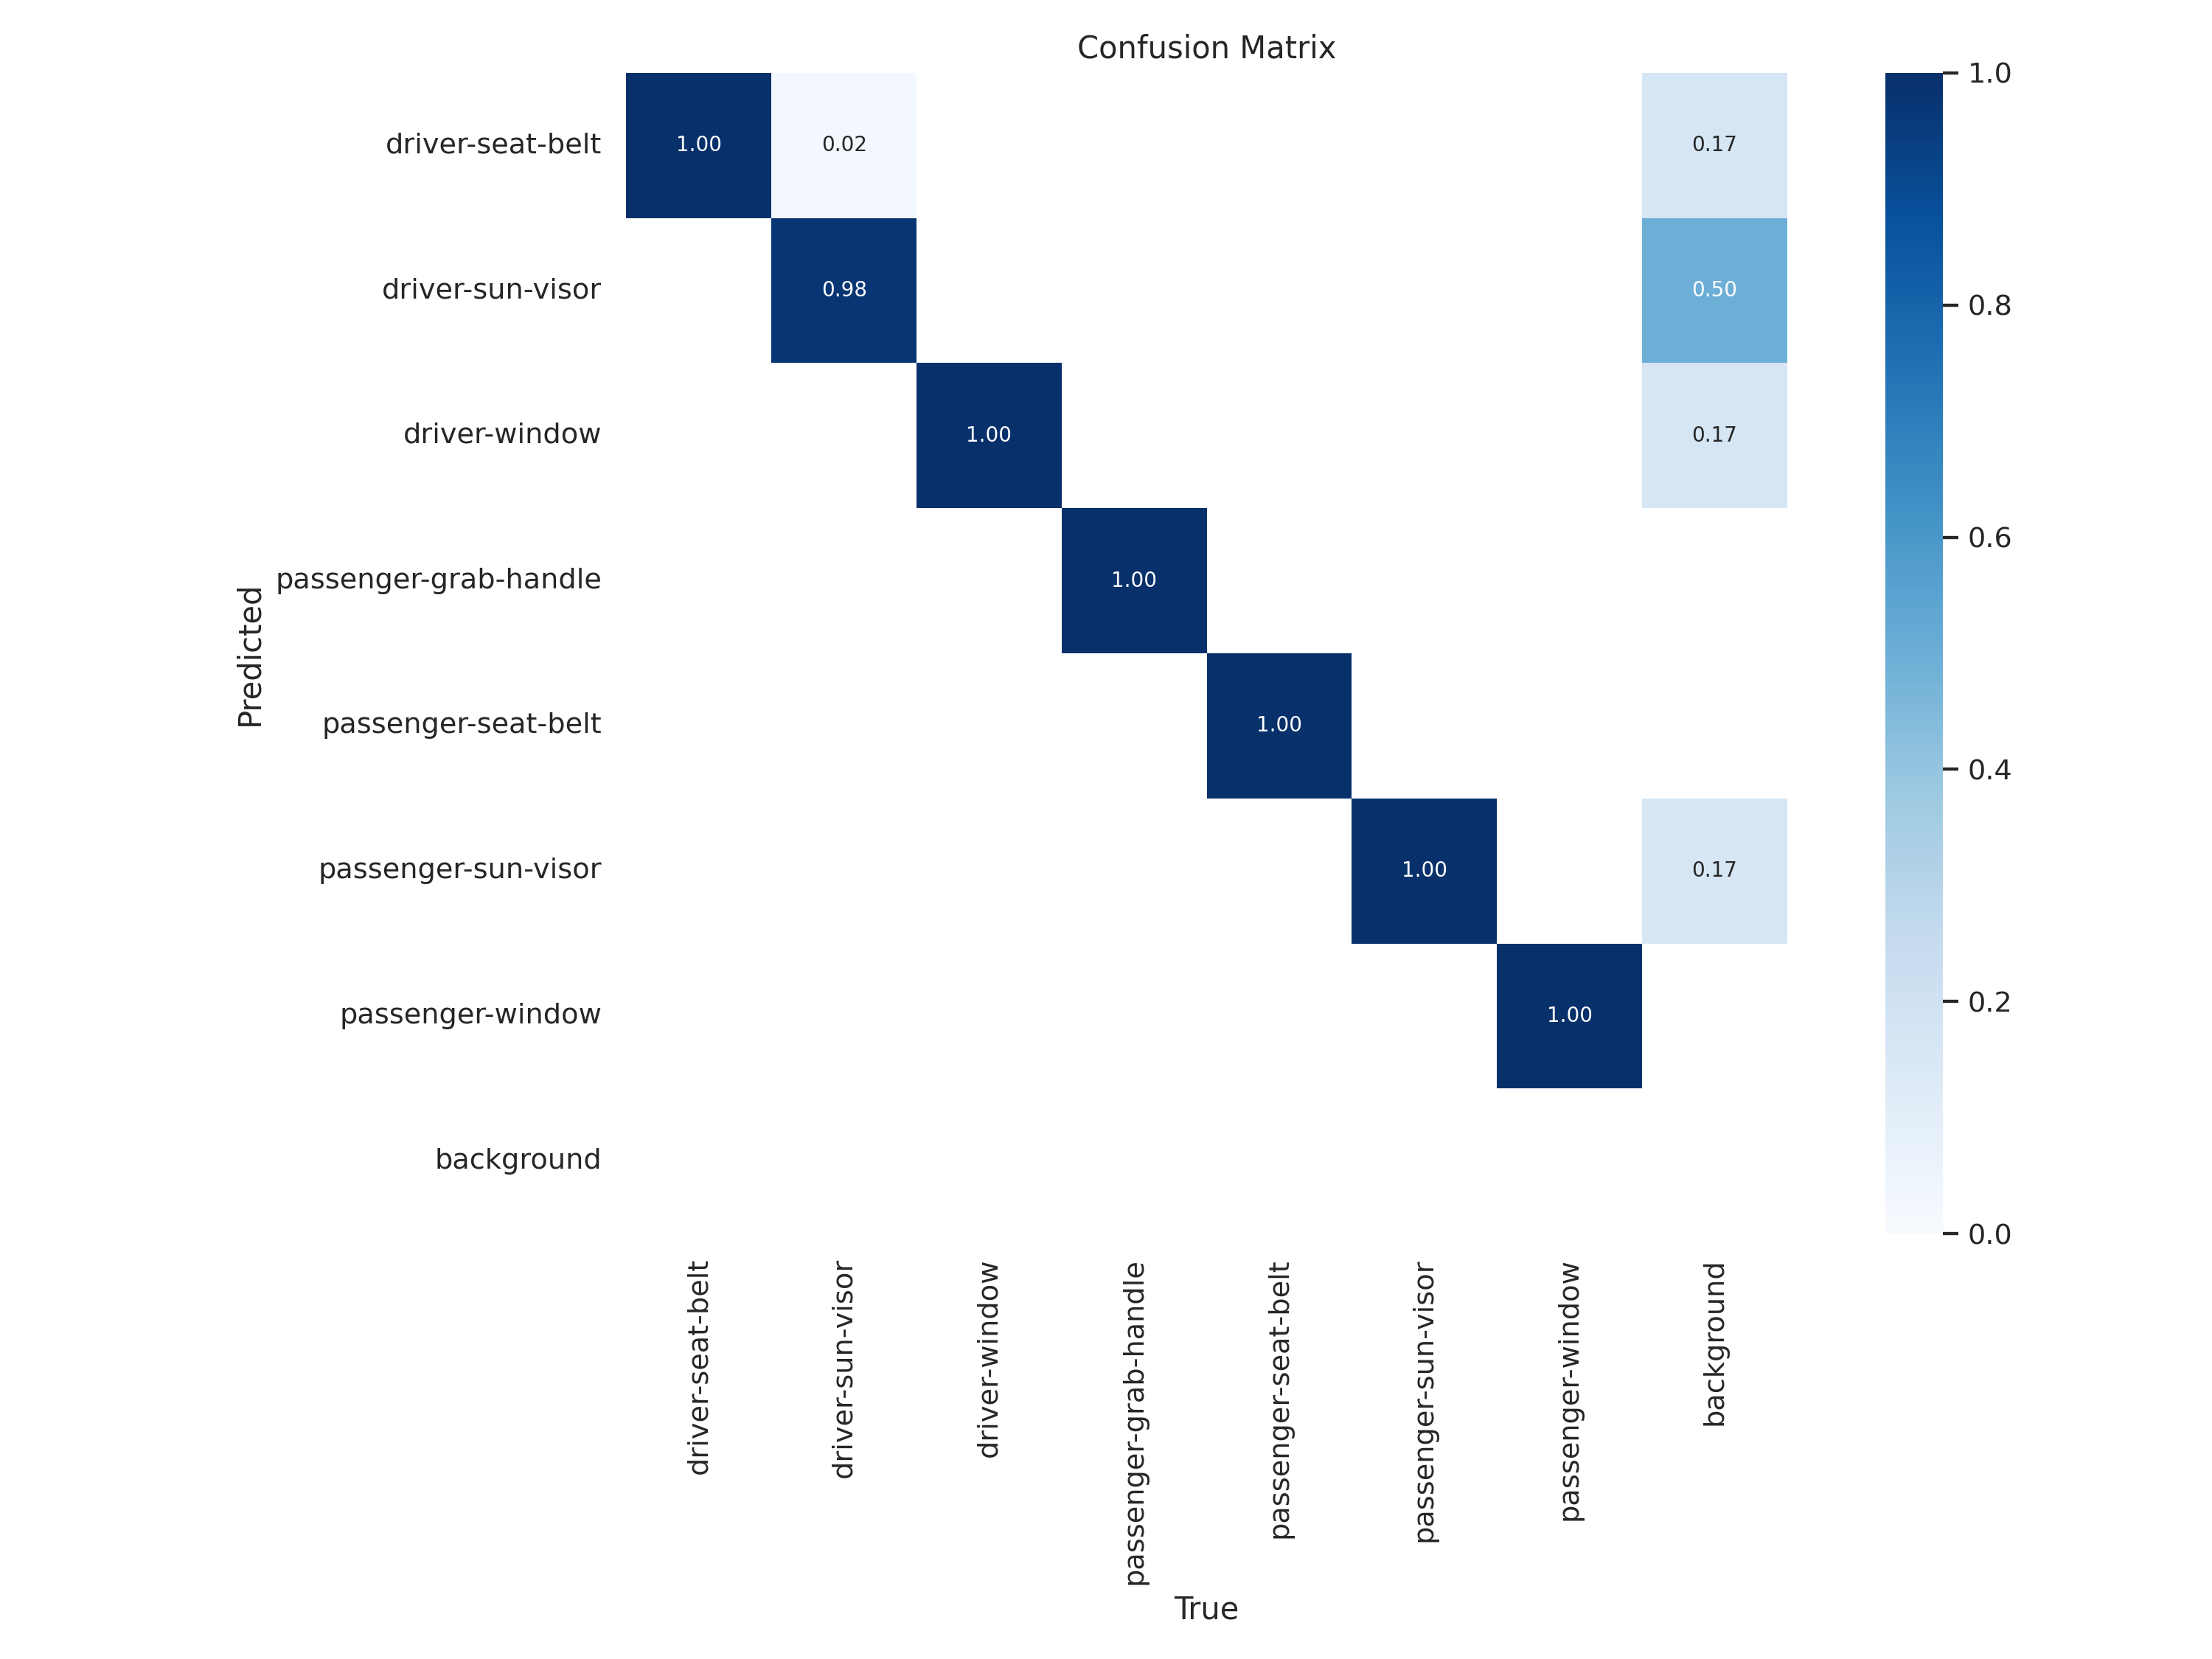

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

/content


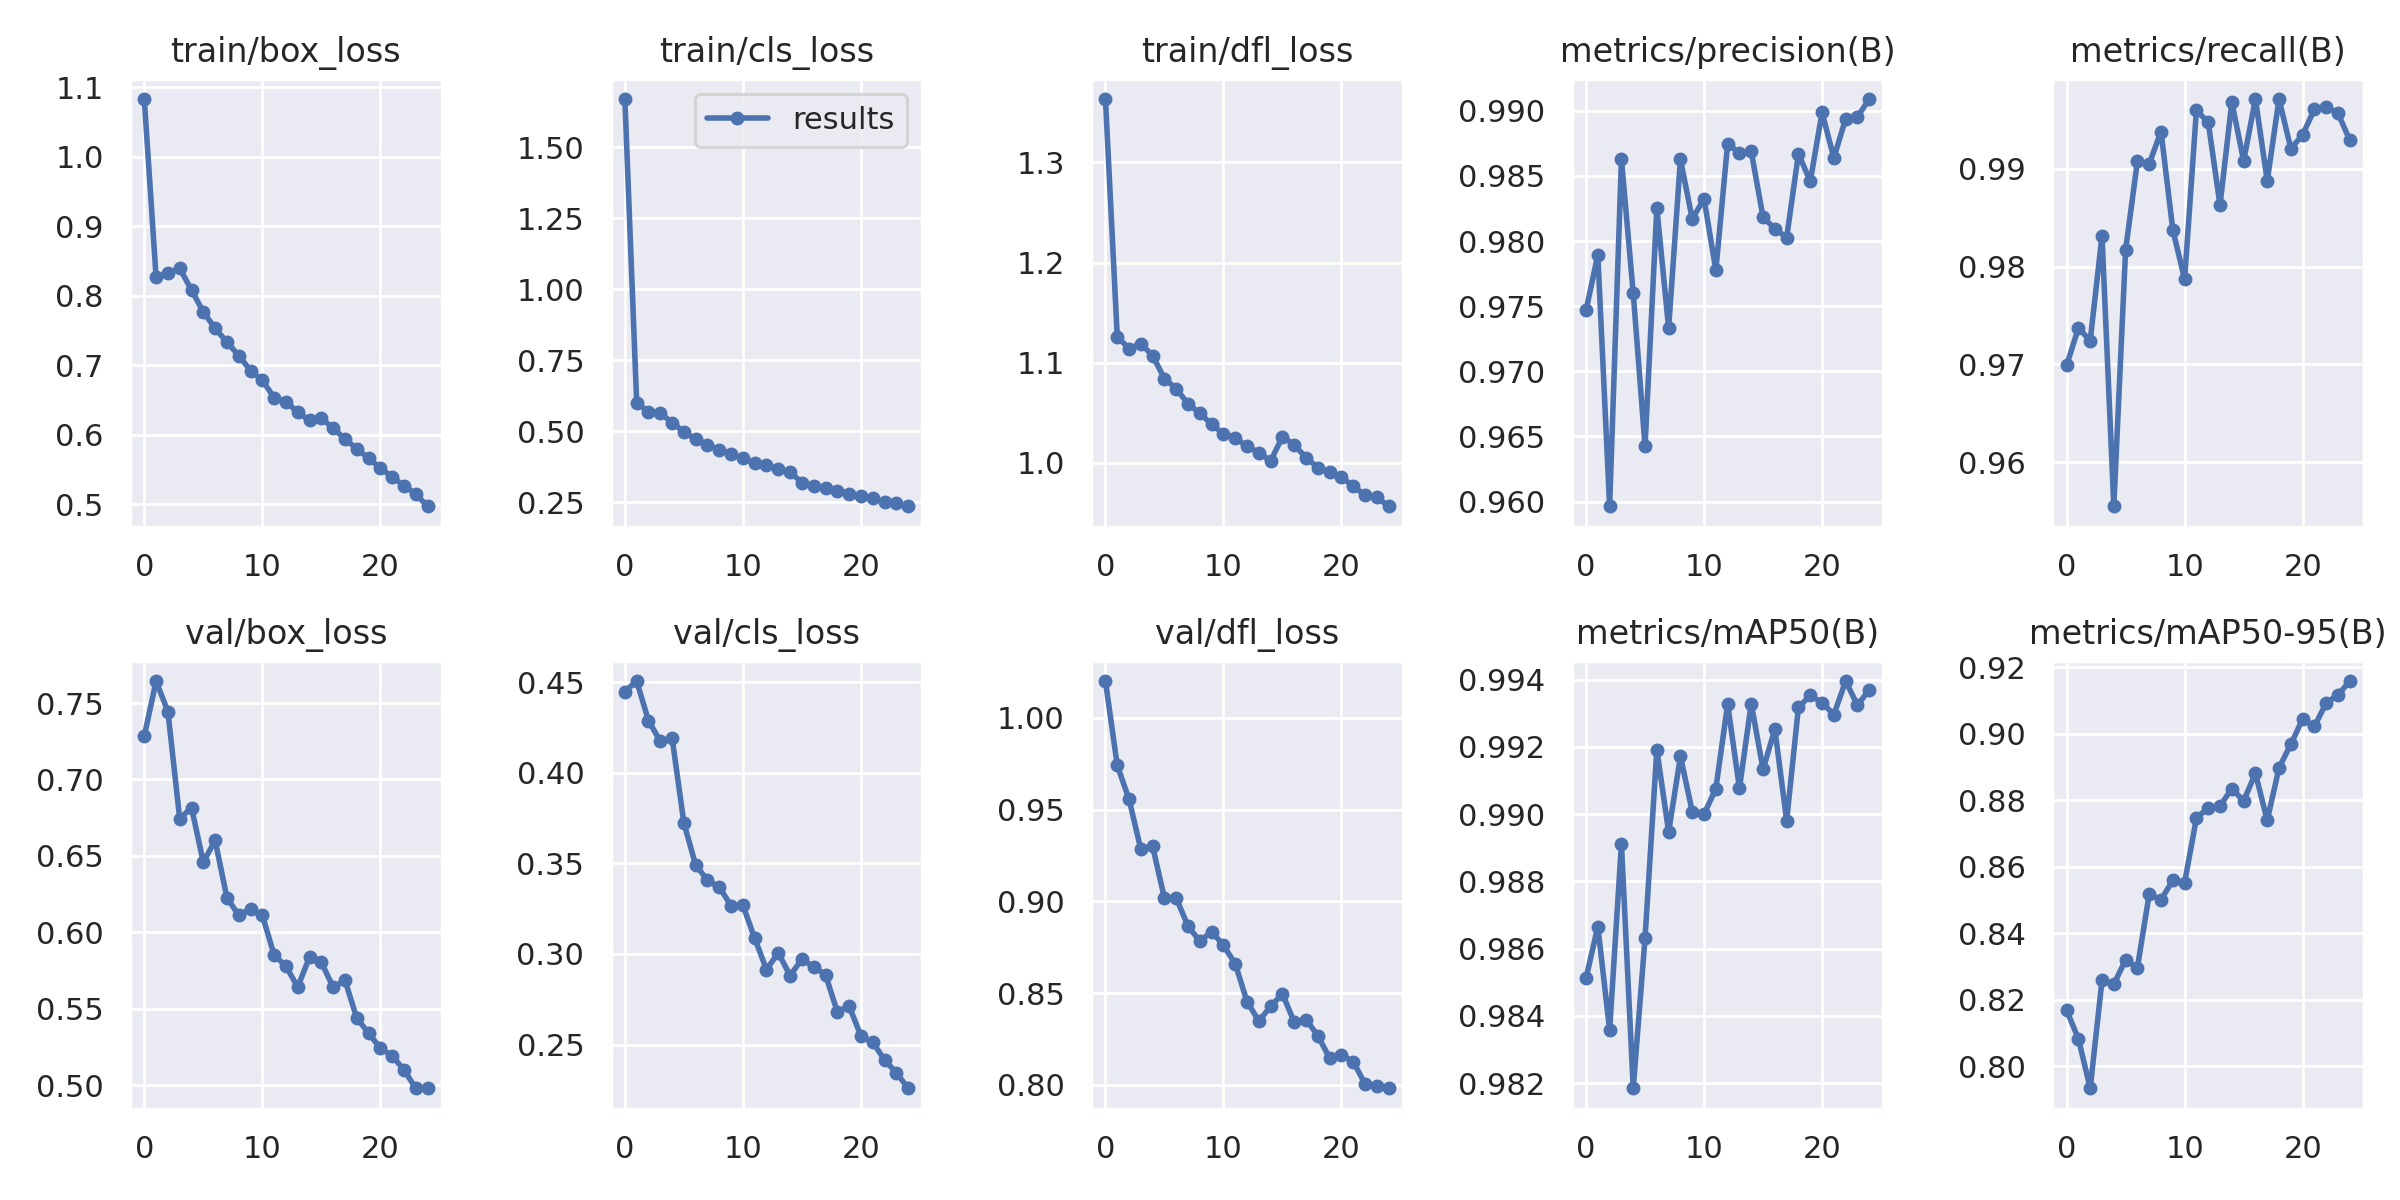

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}
# Validation dataset
!yolo task=detect mode=val model=runs/detect/train3/weights/best.pt data=datasets/Texting-and-Driving-1/data.yaml

/content
2023-08-25 13:23:09.691818: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-25 13:23:10.622166: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Texting-and-Driving-1/valid/labels.cache... 217 images, 0 backgrounds, 0 corrupt: 100% 217/217 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 14/14 [00:07<00:00,  1.88it/s]
                   all        217        643      0.991      0.993      0.994      0.916
      driver-seat-belt      

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/val_batch1_pred.jpg', width=600)

***scommentare le righe di codice se lo si vuole salvare***

# Salvare il modello ottenuto
Possiamo salvare i pesi del modello appena allenato nel nostro google drive (link della cartella condivisa con tutti i pesi https://drive.google.com/drive/folders/1C_gbs3u8XcdAeOGImWvidZHj7BTpTDcH?usp=sharing), in questo modo possiamo fare a meno di utilizzare la inference API di Roboflow e possiamo lavorare direttamente con la CLI ```yolo TASK MODE ARGS``` (più dettagli su https://docs.ultralytics.com/usage/cli)

Per salvare i pesi della rete ho deciso di utilizzare la seguente convenzione:

```weights_YYYY-MM-DD_H-M-S.pt```

che identificano univocamente i pesi del modello appena allenato, in particolare:
- YYYY è l'anno
- MM è il mese
- DD è il giorno
- H è l'ora
- M sono i minuti
- S sono i secondi

In [ ]:
from datetime import datetime

# oggetto che contiene la data e l'ora corrente
now = datetime.now()

# YY-mm-dd_H:M:S
dt_string = now.strftime("%Y-%m-%d_%H-%M-%S")

from google.colab import drive
drive.mount('/content/gdrive')

!cp {HOME}/runs/detect/train3/weights/best.pt {HOME}/gdrive/"My Drive"/texting_and_driving/weights/pretrained_weights_{dt_string}.pt
drive.flush_and_unmount()

Mounted at /content/gdrive
